In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [9]:

q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% df from the Pregnancies column
df_cleaned = df[df['Pregnancies']<q]
q = df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% df from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]
q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% df from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]
q = df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% df from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% df from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]
q = df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% df from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

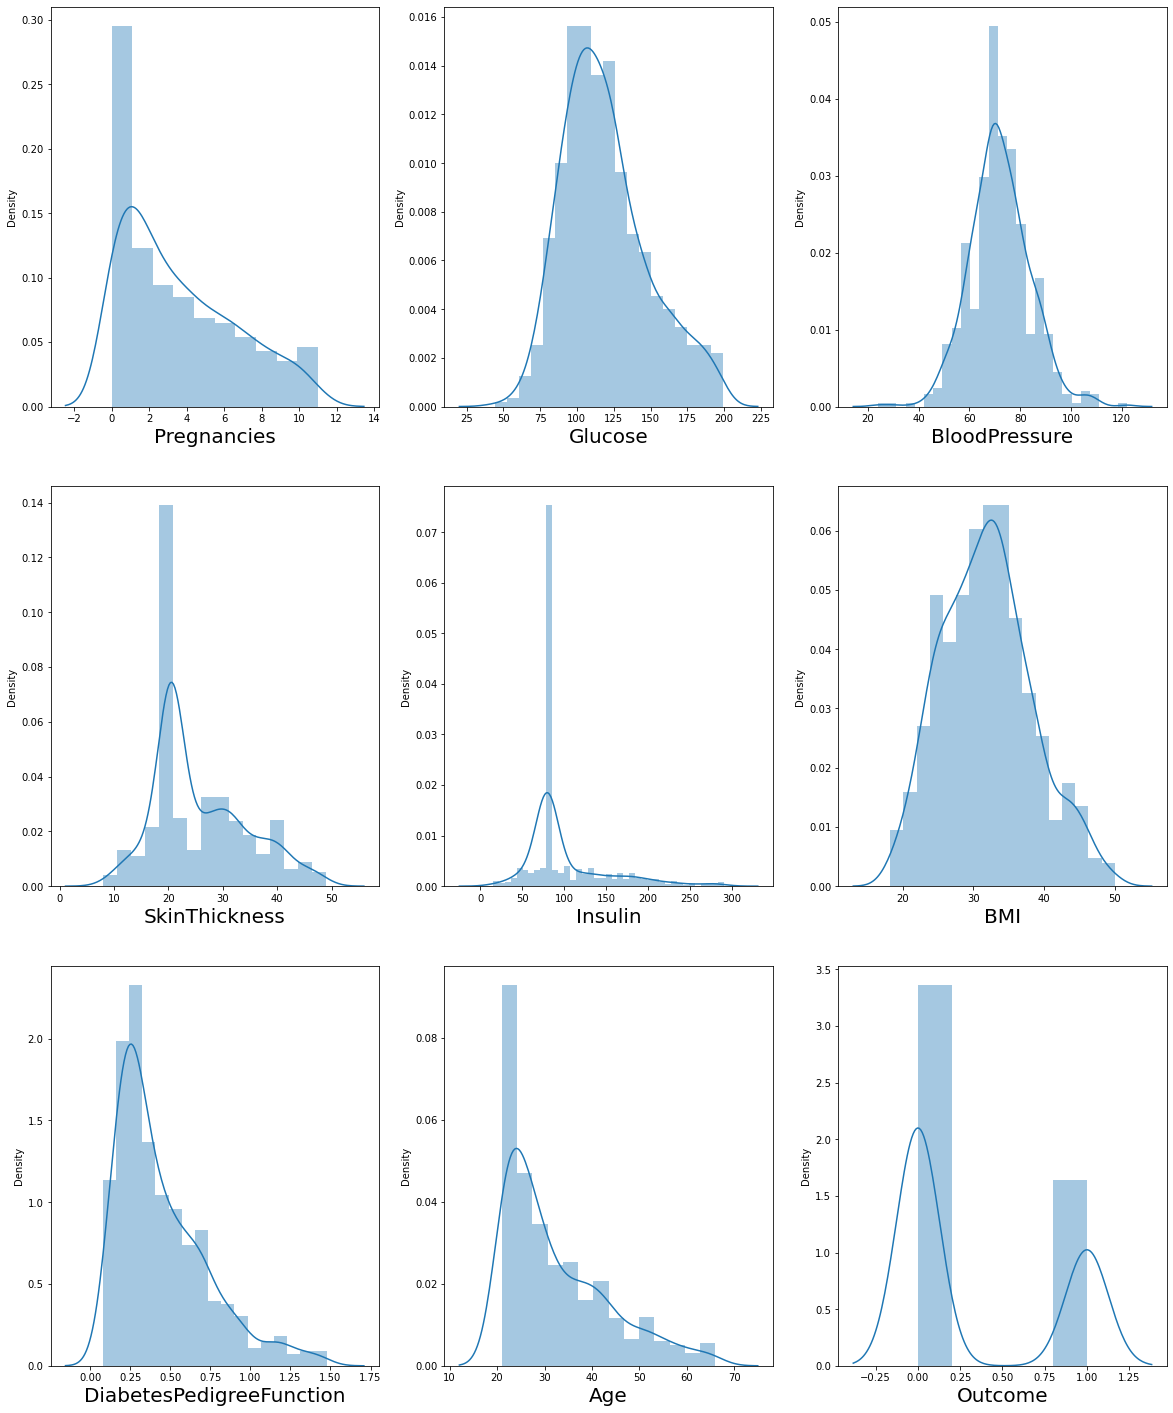

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = pd.DataFrame()

In [25]:
vif['VIF'] =  [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

In [28]:
vif['Features']  = X.columns

In [29]:
vif

,VIF,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [33]:
model.fit(X_train, y_train)

GaussianNB()

In [34]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [35]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [37]:
accuracy_score(y_test, y_pred)

0.7864583333333334

In [38]:
confusion_matrix(y_test, y_pred)

array([[109,  16],
       [ 25,  42]], dtype=int64)

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [44]:
auc= roc_auc_score(y_test, y_pred)
auc

0.7494328358208956

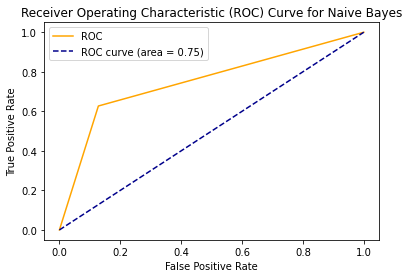

In [49]:
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()